In [1]:
# 불필요한 경고 출력을 방지
import warnings
warnings.filterwarnings('ignore')


In [17]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [5]:
iris = load_iris()

In [7]:
print(iris.DESCR)
print(iris.keys())

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
data = iris['data']
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [9]:
feature_names = iris.feature_names
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
#make df
df_iris = pd.DataFrame(data, columns = feature_names)

In [11]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
df_iris['target'] = iris.target

In [15]:
# pca 분석
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components = 2)

In [18]:
# StandardScaler로 데이터 normalization 적용
data_scaled = StandardScaler().fit_transform(df_iris.iloc[:, :4])
data_scaled[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [19]:
pca_data = pca.fit_transform(data_scaled)
pca_data[:3]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802]])

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

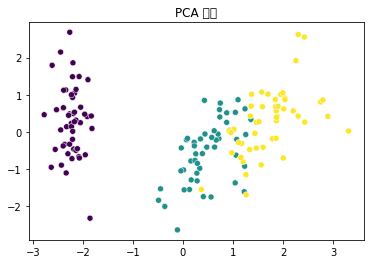

In [21]:
sns.scatterplot(pca_data[:, 0], pca_data[:, 1], c = iris.target)
plt.title('PCA 결과')
plt.show()

In [24]:
pca = PCA(n_components = 0.99)
pca

PCA(n_components=0.99)

In [26]:
pca_data = pca.fit_transform(data_scaled)

In [27]:
pca_data[:5]

array([[-2.26470281,  0.4800266 , -0.12770602],
       [-2.08096115, -0.67413356, -0.23460885],
       [-2.36422905, -0.34190802,  0.04420148],
       [-2.29938422, -0.59739451,  0.09129011],
       [-2.38984217,  0.64683538,  0.0157382 ]])

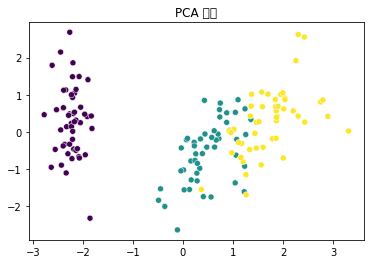

In [28]:
sns.scatterplot(pca_data[:, 0], pca_data[:, 1], c = iris.target)
plt.title('PCA 결과')
plt.show()

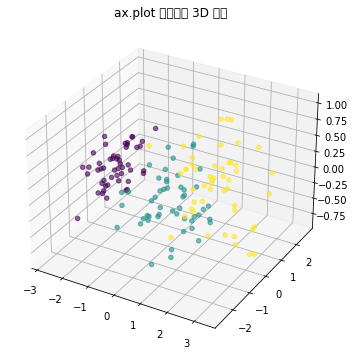

In [30]:
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111, projection = '3d') # Axe3D object

sample_size = 50
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], alpha=0.6, c=df_iris['target'])

plt.savefig('./temp.svg')
plt.title('ax.plot 차원축소 3D 확인')
plt.show()


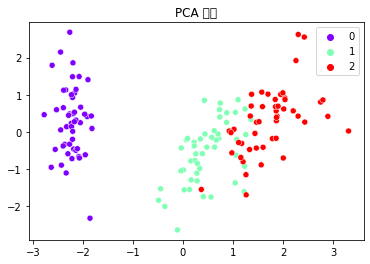

In [31]:
sns.scatterplot(pca_data[:, 0], pca_data[:, 1], hue=iris.target, palette="rainbow")
plt.title('PCA 결과')
plt.show()

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler


In [33]:
ida = LinearDiscriminantAnalysis(n_components = 2)

In [ ]:
# StandardScaler로 데